# 차종별 고속도로 교통량

### 1. 데이터 확인

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from matplotlib import font_manager, rc
font_path = "C:/KHR/PYDATAexam/data/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [4]:
#교통사고 데이터 로드
df1 = pd.read_csv("20210523차종별교통량.csv", encoding='CP949', header=0)
df2 = pd.read_csv("20210524차종별교통량.csv", encoding='CP949', header=0)
df3 = pd.read_csv("20210525차종별교통량.csv", encoding='CP949', header=0)
df4 = pd.read_csv("20210526차종별교통량.csv", encoding='CP949', header=0)
df5 = pd.read_csv("20210527차종별교통량.csv", encoding='CP949', header=0)
df6 = pd.read_csv("20210528차종별교통량.csv", encoding='CP949', header=0)
df7 = pd.read_csv("20210529차종별교통량.csv", encoding='CP949', header=0)

df = pd.concat([df1, df2, df3, df4, df5, df6, df7])

In [6]:
# 데이터 확인
df = df[['기준일자', '기준시', 'AVC차종구분코드', '교통량']]
display(df)

,기준일자,기준시,AVC차종구분코드,교통량
0,20210523,0,1,366
1,20210523,0,2,6
2,20210523,0,3,13
3,20210523,0,4,4
4,20210523,0,5,2
...,...,...,...,...
92659,20210529,23,9,0
92660,20210529,23,10,0
92661,20210529,23,11,0
92662,20210529,23,12,0


### 2. 데이터 전처리

In [11]:
# -1값을 가진 행 삭제, 차종구분코드 1인 행 삭제
df = df.loc[df.교통량>0, :]
df = df.loc[df.AVC차종구분코드>1, :]
display(df)

,기준일자,기준시,AVC차종구분코드,교통량
1,20210523,0,2,6
2,20210523,0,3,13
3,20210523,0,4,4
4,20210523,0,5,2
9,20210523,0,10,1
...,...,...,...,...
92643,20210529,23,6,2
92648,20210529,23,11,1
92653,20210529,23,3,6
92655,20210529,23,5,1


In [12]:
# 집계시 groupby - 시간대에 따른 교통량
df_group = df.groupby('기준시')
hour = []
total = []
for key, group in df_group :
    hour.append(key)
    total.append(group['교통량'].sum())
df_volumn = pd.DataFrame({'시간대':hour, '교통량':total})

In [13]:
display(df_volumn)

,시간대,교통량
0,0,231213
1,1,193095
2,2,187713
3,3,209515
4,4,289511
5,5,491274
6,6,754546
7,7,833784
8,8,804019
9,9,878022


### 3. 시각화

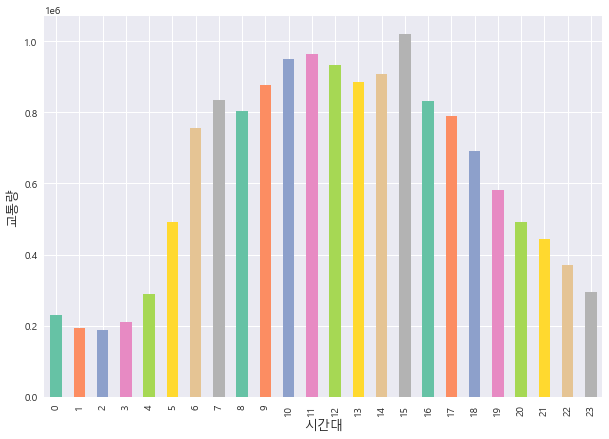

In [23]:
mycolors = sns.color_palette('Set2',len(df_volumn['시간대']))

plt.figure(figsize=(10,7))
df_volumn['교통량'].plot(kind='bar', color=mycolors )
plt.xlabel('시간대', size=13)
plt.ylabel('교통량', size=13)
#plt.title('시간대에 따른 고속도로 교통량', size=20)

plt.savefig("시간대에_따른_차종별_고속도로_교통량.png") 